# Mathematical Underpinnings - Lab 2

Population risk: $R(\theta, \theta^*) = E(\mathcal{L}(f(X), Y))$

Empirical risk: $\hat{R}(\theta, \theta^*) = \frac{1}{n}\sum_{i=1}^n\mathcal{L}(f(x_i), y_i)$

ERM: $\hat{\theta} = \argmin_{\theta}\hat{R}(\theta, \theta^*)$

We want this to be small: $\mid R(\hat{\theta},\theta^*) - \mathit{inf}_{\theta}R(\theta, \theta^*)\mid (\star)$

From lecture: $(\star) \leq g(VC)$

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

$R(a, a^*) = E(a^2X^2) - E(2aXY) - E(Y^2) = a^2 = a^2 \cdot 1 - 2aE(X(X + \epsilon)) + E(Y^2) = 
a^2 - 2a(E(X^2) + E(X\epsilon)) + E(X^2 + 2X\epsilon + \epsilon^2) = a^2 - 2a(1 + 0) + 1 + 0 + \sigma^2 = a^2 - 2a + 1 +\sigma^2 = (a - 1)^2 + \sigma^2$

$a^* = 1$

In [91]:
import numpy as np

def population_risk(a, sigma_eps):
    return (a - 1) ** 2 + sigma_eps

sigma_eps = 1
a = 1

population_risk(a, sigma_eps)

1

### b)

In [92]:
# sampling
n = 50
sigma = 1

X = np.random.randn(n, 1)
eps = np.random.randn(n, sigma)
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [93]:
def empirical_risk(a, x, y):
    return np.mean((a * x - y) ** 2)

empirical_risk(a, X, Y)

0.7953251436907313

### c)

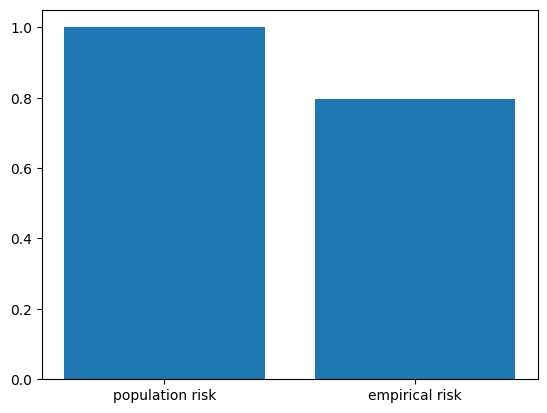

In [94]:
import matplotlib.pyplot as plt

plt.bar(
    ['population risk', 'empirical risk'],
    [population_risk(a, sigma_eps), empirical_risk(a, X, Y)])
plt.show()
# code, plot

$ \argmin \mathit{PR} = 1 $

$ \mathit{ER} = \frac{1}{n} (aX - Y)(aX - Y)^T = \frac{1}{n} (a^2XX^T - 2aX^TY + Y^2)$

$ \nabla_{a} \mathit{ER} = \frac{1}{n} (2aXX^T - 2XY^T) = 0 \iff a = \frac{XY^T}{||X||_2}$

In [95]:
a_hat = (X.T @ Y) / (2 * X.T @ X) 
a_hat.item()

0.5476879996160029

In [96]:
population_risk(a_hat, sigma_eps).item()

1.204586145691373

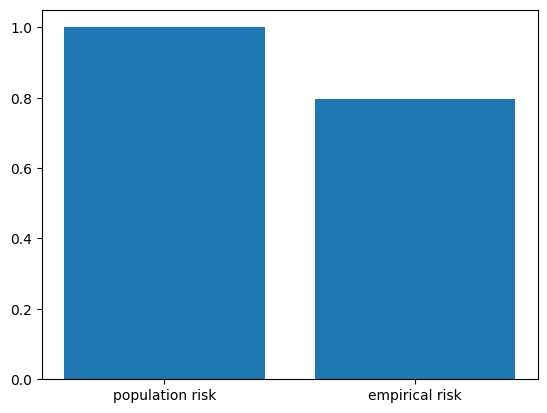

In [97]:
plt.bar(
    ['population risk', 'empirical risk'],
    [population_risk(a, sigma_eps), empirical_risk(a, X, Y)])
plt.show()

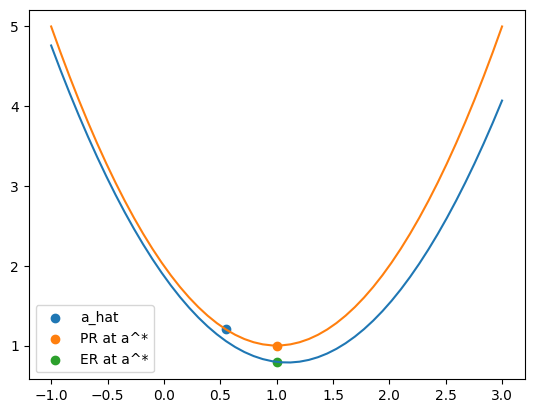

In [98]:
a_vec = np.linspace(-1, 3)
plt.plot(a_vec, [empirical_risk(a_v, X, Y) for a_v in a_vec])
plt.plot(a_vec, [population_risk(a_v, sigma_eps) for a_v in a_vec])
plt.scatter([a_hat], [population_risk(a_hat, sigma_eps)], label = 'a_hat')
plt.scatter([a], [population_risk(a, sigma_eps)], label = 'PR at a^*')
plt.scatter([a], [empirical_risk(a, X, Y)], label = 'ER at a^*')
plt.legend()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

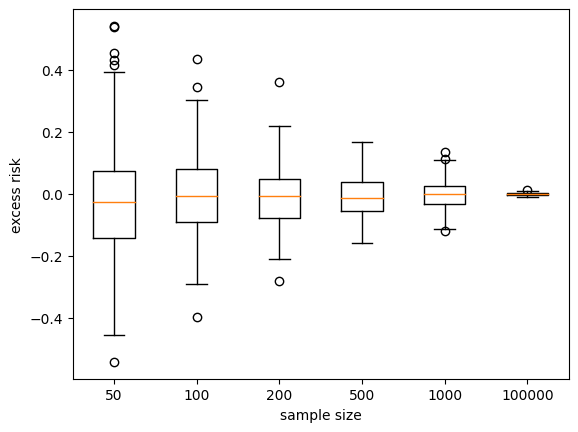

In [99]:
# excess risk

sigma = 1
sigma_eps = 1
L = 200

def excess_risk(n):

    X = np.random.randn(n, 1)
    eps = np.random.randn(n, sigma)
    Y = X + eps
    a_hat = (X.T @ Y) / (X.T @ X) 

    return empirical_risk(a_hat, X, Y) - sigma_eps


n_s = [50, 100, 200, 500, 1000, 100000]

er_all = {n: [None] * L for n in n_s}

for n in n_s:
    for i in range(L):
        er_all[n][i] = excess_risk(n)

plt.boxplot(list(er_all.values()), labels = n_s)
plt.xlabel('sample size')
plt.ylabel('excess risk')
plt.show()

In [100]:
# simulations with fixed sample size

In [101]:
# simulations for various sample sizes

In [102]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)